In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [2]:
!scp hcm:/home/sebastian/work/boptx/examples/matsim/working_directory/calibration.p .

calibration.p                                 100% 1130KB  79.6MB/s   00:00    


In [3]:
with open("calibration.p", "rb") as f:
    data = pickle.load(f)

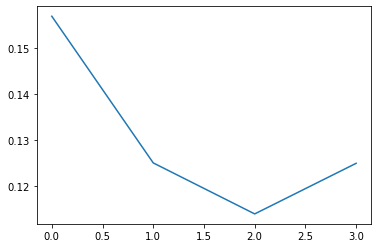

In [4]:
objectives = [
    evaluation["objective"] for evaluation in data["evaluations"]
]

plt.plot(objectives)

In [5]:
!scp hcm:/home/sebastian/work/boptx/examples/matsim/working_directory/993ec3ca17d3da1d05347f132e3b0b82/output/boptx_termination.csv .

boptx_termination.csv                         100%  314KB  42.3MB/s   00:00    


In [6]:
df = pd.read_csv("boptx_termination.csv", sep = ";")

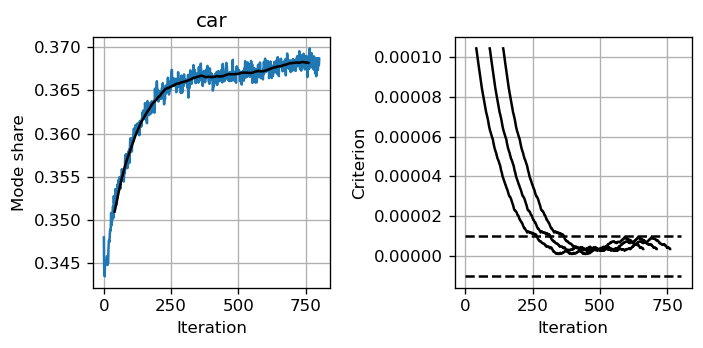

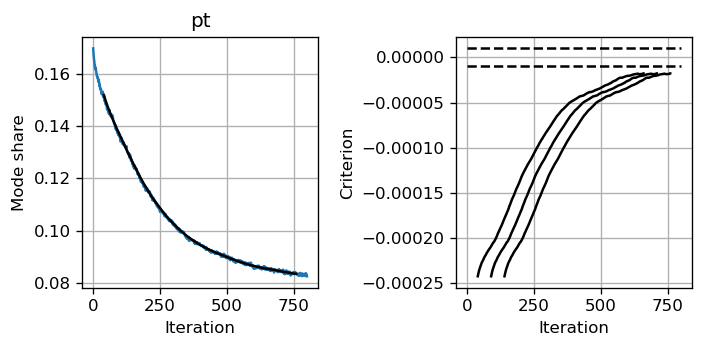

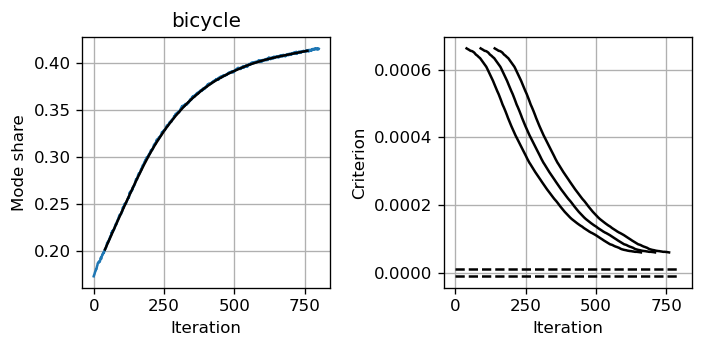

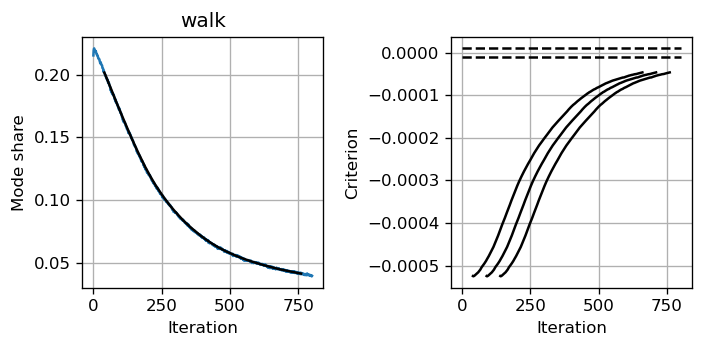

In [7]:
for mode in ["car", "pt", "bicycle", "walk"]:
    plt.figure(figsize = (6, 3), dpi = 120)

    plt.subplot(1, 2, 1)
    plt.plot(df["iteration"], df["{}_y".format(mode)], "C0")
    plt.plot(df["iteration"], df["{}_s".format(mode)], "k")
    plt.title(mode)
    plt.xlabel("Iteration")
    plt.ylabel("Mode share")
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(df["iteration"], df["{}_dm".format(mode)], "k")
    plt.plot(df["iteration"], df["{}_d".format(mode)], "k")
    plt.plot(df["iteration"], df["{}_dp".format(mode)], "k")

    plt.plot(df["iteration"], df["T"], "k--")
    plt.plot(df["iteration"], -df["T"], "k--")
    plt.xlabel("Iteration")
    plt.ylabel("Criterion")
    plt.grid()

    plt.tight_layout()

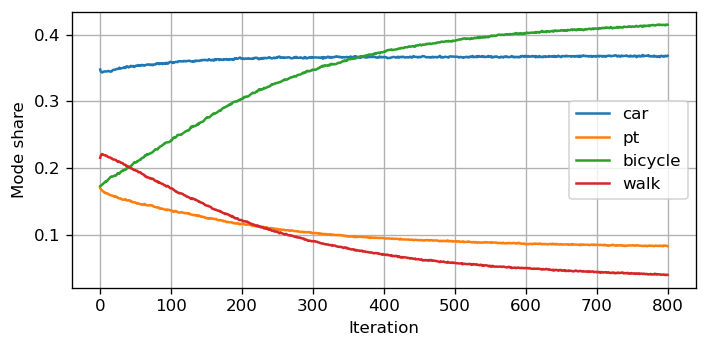

In [8]:
plt.figure(figsize = (6, 3), dpi = 120)

for mode in ["car", "pt", "bicycle", "walk"]:
    plt.plot(df["iteration"], df["{}_y".format(mode)], label = mode)
    
plt.xlabel("Iteration")
plt.ylabel("Mode share")
plt.grid()
plt.legend(loc = "best")

plt.tight_layout()